# <a id='toc1_'></a>[深層学習ノートブック まとめ-1](#toc0_)
DL_notebook-1~15までの内容を自分用にまとめる。  
これらのノートの内容は詰まるところ、下記の学習ループに集約される。  
これが深層学習における基本的な学習ループとなる。  

参考：  
* [Udemy講座：「①米国AI開発者がやさしく教える深層学習超入門第一弾【Pythonで実践】」](https://www.udemy.com/course/deeplearning1/learn/lecture/40143418)

In [4]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split


# 各ノートにあるMLPの学習ループをライブラリとしてまとめたもの
from lib.mlp_learn import MLP_2Layers, learn
from lib.custom_dataset import CustomDataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# バッチサイズを定義。今回は１ミニバッチ＝３２データとする
batch_size = 8

# データ読み込み。8x8のMNISTデータセットをカスタムデータセットとして読み込む。（練習のため）
dataset = datasets.load_digits()
X = dataset['images'] # 0~16の値をもつ
X = ( X * (255. / 16.) ).astype(np.uint8)
y = dataset['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
transform = transforms.Compose([
    transforms.ToTensor(), # 0~255 -> 0~1
    transforms.Normalize((0.5,), (0.5)) # 0~1 -> -1~1
])

# Datasetとして読み込み
train_dataset = CustomDataset(X_train, y_train, transform=transform)
val_dataset = CustomDataset(X_val, y_val, transform=transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

# モデルのコンストラクタに渡す引数を定義。
num_in = 64
num_hidden = 30
num_out = 10

# モデル定義（２層のMLP）
MLP_model = MLP_2Layers(num_in=num_in, num_hidden=num_hidden, num_out=num_out)

# requires_grad_をTrueに設定。最後に_がつくのは設定するという意味。
MLP_model.requires_grad_(True)

# torch.optimを使ってOptimizerを定義
optimizer = optim.SGD(MLP_model.parameters(), lr=0.03)

# schedulerにはcosine annealing lrを指定
cosine_ann_lr_scheduler = CosineAnnealingLR(optimizer, T_max=25)

In [10]:
# 学習ループ実行
train_result, params_result = learn(MLP_model, train_loader, val_loader, optimizer, F.cross_entropy,
                          epoch=100, early_stopping=None, save_path=None, lr_scheduler=cosine_ann_lr_scheduler)

epoch_0: {'Loss_train': 1.7792320960097843, 'Loss_val': 1.0851004971398248, 'Accuracy': 0.8027777777777778}, Learning Rate: 0.03
epoch_1: {'Loss_train': 0.7033771060407161, 'Loss_val': 0.4435059719615512, 'Accuracy': 0.8972222222222223}, Learning Rate: 0.02997040092642407
epoch_2: {'Loss_train': 0.3746805601235893, 'Loss_val': 0.2951572237743272, 'Accuracy': 0.9222222222222223}, Learning Rate: 0.029881720519717166
epoch_3: {'Loss_train': 0.2602980551827285, 'Loss_val': 0.2303834961520301, 'Accuracy': 0.9416666666666667}, Learning Rate: 0.029734308760930327
epoch_4: {'Loss_train': 0.21008390393108128, 'Loss_val': 0.20126987654301856, 'Accuracy': 0.9333333333333333}, Learning Rate: 0.02952874741692946
epoch_5: {'Loss_train': 0.1758397186278469, 'Loss_val': 0.170463104877207, 'Accuracy': 0.9555555555555556}, Learning Rate: 0.0292658477444273
epoch_6: {'Loss_train': 0.15138444919397848, 'Loss_val': 0.15974548442496195, 'Accuracy': 0.9527777777777777}, Learning Rate: 0.028946647288323767
ep

In [11]:
train_losses = []
val_losses = []

for value in train_result.values():
    train_losses.append(value['Loss_train'])
    val_losses.append(value['Loss_val'])

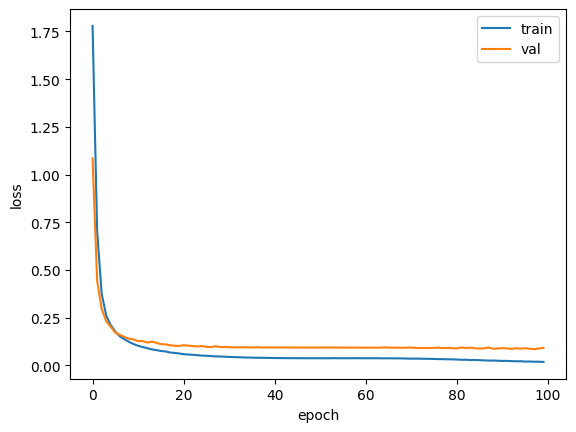

In [12]:
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()